In [73]:
import sys, os
import random
import math
import argparse
from tqdm import tqdm
from datetime import datetime 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.distributions import Normal
from torch.utils.data import DataLoader
from torchvision.utils import save_image

sys.path.append("../gqn-wohlert")
sys.path.append("../src")
from gqn import GenerativeQueryNetwork
from datasets import Face3D, transform_viewpoint
from utils import * 
import gc

# cuda = torch.cuda.is_available()
cuda = False
device = torch.device("cuda:0" if cuda else "cpu")
device

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
test_data_dir = "/media/yueqi/Data1/data_ml/gqn_dataset/face3d_20181111-032039/test/"
test_dataset_random = Face3D(root_dir=test_data_dir, target_transform=transform_viewpoint, n_imgs='all')
test_dataset_axis = Face3D(root_dir=test_data_dir, target_transform=transform_viewpoint, n_imgs='all', sample_type='angle_axis')

train_data_dir = "/media/yueqi/Data1/data_ml/gqn_dataset/face3d_20181111-032039/train/"
train_dataset_random = Face3D(root_dir=train_data_dir, target_transform=transform_viewpoint, n_imgs='all')
train_dataset_axis = Face3D(root_dir=train_data_dir, target_transform=transform_viewpoint, n_imgs='all', sample_type='angle_axis')

In [3]:
# Pixel variance
sigma_f, sigma_i = 0.7, 2.0
# Learning rate
mu_f, mu_i = 5*10**(-5), 5*10**(-4)
mu, sigma = mu_f, sigma_f

In [59]:
model_checkpoint = "../output/gqn-face3d-20181111-063040/checkpoints/model-56000.pt"
checkpoint_name = os.path.basename(model_checkpoint).split(".")[-2]
print(checkpoint_name)

model-56000


In [60]:
model = torch.load(model_checkpoint, map_location=device)

In [38]:
log_dir = os.path.dirname(os.path.dirname(model_checkpoint))
log_dir

'../output/gqn-face3d-20181111-063040'

In [61]:
result_dir = os.path.join(log_dir, 'predictions_' + checkpoint_name)
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
print(result_dir)

../output/gqn-face3d-20181111-063040/predictions_model-56000


In [40]:
single_context_rendering(model, test_dataset_axis, 2, (0, 20,0), sigma, figdir=result_dir)

/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [41]:
multi_context_rendering(model, test_dataset_random, 2, 5, sigma, figdir=result_dir)

/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [23]:
test_dataset_axis[2][0][2].shape

torch.Size([3, 64, 64])

In [42]:
save_image(test_dataset_random[2][0][:5], os.path.join(result_dir, 'rand_ctxt_5.jpg'))

In [43]:
save_image(test_dataset_random[2][0][:2], os.path.join(result_dir, 'rand_ctxt_2.jpg'))

In [46]:
save_image(train_dataset_random[2][0][:8], os.path.join(result_dir, 'train_rand_ctxt_8.jpg'), nrow=4)

In [53]:
save_image(train_dataset_random[2][0][14], os.path.join(result_dir, 'train_rand_ctxt_target.jpg'))

In [45]:
target_v = (0,20,0)
fixed_context = find_viewpoint_input(test_dataset_axis[2][0], test_dataset_axis[2][1], target_v)[0]
save_image(fixed_context, os.path.join(result_dir, 'fixed_ctxt_{}_{}_{}.jpg'.format(*target_v)))

In [63]:
result_dir = os.path.join(log_dir, 'predictions_' + checkpoint_name)
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
print(result_dir)

../output/gqn-face3d-20181111-063040/predictions_model-56000


In [64]:
multi_context_rendering(model, test_dataset_random, 5, 8, sigma, figdir=result_dir)

/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [68]:
save_image(test_dataset_random[5][0][:8], os.path.join(result_dir, 'test_rand_ctxt_8.jpg'), nrow=4)

In [70]:
save_image(test_dataset_axis[5][0], os.path.join(result_dir, 'test_axis_ctxt_target.jpg'))

In [ ]:
model(x, v)

In [72]:
test_dataset_axis[5][1] * 60

tensor([[-10.,   0.,   0.],
        [-20.,   0.,   0.],
        [-30.,   0.,   0.],
        [-40.,   0.,   0.],
        [-50.,   0.,   0.],
        [  0., -10.,   0.],
        [  0., -20.,   0.],
        [  0., -30.,   0.],
        [  0., -40.,   0.],
        [  0., -50.,   0.],
        [  0.,   0., -10.],
        [  0.,   0., -20.],
        [  0.,   0., -30.],
        [  0.,   0., -40.],
        [  0.,   0., -50.],
        [  0.,   0.,   0.],
        [  0.,   0.,  10.],
        [  0.,   0.,  20.],
        [  0.,   0.,  30.],
        [  0.,   0.,  40.],
        [  0.,   0.,  50.],
        [  0.,  10.,   0.],
        [  0.,  20.,   0.],
        [  0.,  30.,   0.],
        [  0.,  40.,   0.],
        [  0.,  50.,   0.],
        [ 10.,   0.,   0.],
        [ 20.,   0.,   0.],
        [ 30.,   0.,   0.],
        [ 40.,   0.,   0.],
        [ 50.,   0.,   0.]])

In [124]:
model_checkpoint = "../output/gqn-face3d-20181111-063040/checkpoints/model-10000.pt"
checkpoint_name = os.path.basename(model_checkpoint).split(".")[-2]
print(checkpoint_name)
model = torch.load(model_checkpoint, map_location=device)
result_dir = os.path.join(log_dir, 'predictions_' + checkpoint_name)
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
print(result_dir)
multi_context_rendering(model, test_dataset_random, 2, 5, sigma, figdir=result_dir)

model-10000


/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'gqn.gqn.GenerativeQueryNetwork' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


../output/gqn-face3d-20181111-063040/predictions_model-10000


/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [125]:
model_checkpoint = "../output/gqn-face3d-20181111-063040/checkpoints/model-20000.pt"
checkpoint_name = os.path.basename(model_checkpoint).split(".")[-2]
print(checkpoint_name)
model = torch.load(model_checkpoint, map_location=device)
result_dir = os.path.join(log_dir, 'predictions_' + checkpoint_name)
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
print(result_dir)
multi_context_rendering(model, test_dataset_random, 2, 5, sigma, figdir=result_dir)

model-20000


/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'gqn.gqn.GenerativeQueryNetwork' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


../output/gqn-face3d-20181111-063040/predictions_model-20000


/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [126]:
model_checkpoint = "../output/gqn-face3d-20181111-063040/checkpoints/model-30000.pt"
checkpoint_name = os.path.basename(model_checkpoint).split(".")[-2]
print(checkpoint_name)
model = torch.load(model_checkpoint, map_location=device)
result_dir = os.path.join(log_dir, 'predictions_' + checkpoint_name)
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
print(result_dir)
multi_context_rendering(model, test_dataset_random, 2, 5, sigma, figdir=result_dir)

model-30000


/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'gqn.gqn.GenerativeQueryNetwork' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


../output/gqn-face3d-20181111-063040/predictions_model-30000


/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [127]:
model_checkpoint = "../output/gqn-face3d-20181111-063040/checkpoints/model-40000.pt"
checkpoint_name = os.path.basename(model_checkpoint).split(".")[-2]
print(checkpoint_name)
model = torch.load(model_checkpoint, map_location=device)
result_dir = os.path.join(log_dir, 'predictions_' + checkpoint_name)
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
print(result_dir)
multi_context_rendering(model, test_dataset_random, 2, 5, sigma, figdir=result_dir)

model-40000


/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'gqn.gqn.GenerativeQueryNetwork' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


../output/gqn-face3d-20181111-063040/predictions_model-40000


/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [128]:
model_checkpoint = "../output/gqn-face3d-20181111-063040/checkpoints/model-50000.pt"
checkpoint_name = os.path.basename(model_checkpoint).split(".")[-2]
print(checkpoint_name)
model = torch.load(model_checkpoint, map_location=device)
result_dir = os.path.join(log_dir, 'predictions_' + checkpoint_name)
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
print(result_dir)
multi_context_rendering(model, test_dataset_random, 2, 5, sigma, figdir=result_dir)

model-50000


/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'gqn.gqn.GenerativeQueryNetwork' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


../output/gqn-face3d-20181111-063040/predictions_model-50000


/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [129]:
model_checkpoint = "../output/gqn-face3d-20181111-063040/checkpoints/model-60000.pt"
checkpoint_name = os.path.basename(model_checkpoint).split(".")[-2]
print(checkpoint_name)
model = torch.load(model_checkpoint, map_location=device)
result_dir = os.path.join(log_dir, 'predictions_' + checkpoint_name)
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
print(result_dir)
multi_context_rendering(model, test_dataset_random, 2, 5, sigma, figdir=result_dir)

model-60000
../output/gqn-face3d-20181111-063040/predictions_model-60000


/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/yueqi/anaconda/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [96]:
data = pd.read_csv("../output/gqn-face3d-20181111-063040/log.txt")

In [97]:
data.columns = [x.strip() for x in data.columns]
data['-elbo'] = data['nll'] + data['kl']
data.head()

,step,nll,kl,-elbo
0,10,9264.306641,197.357056,9461.663696
1,20,8980.582031,135.098877,9115.680908
2,30,8607.216797,129.697617,8736.914413
3,40,7967.689453,180.011261,8147.700714
4,50,7920.892090,246.911240,8167.803329


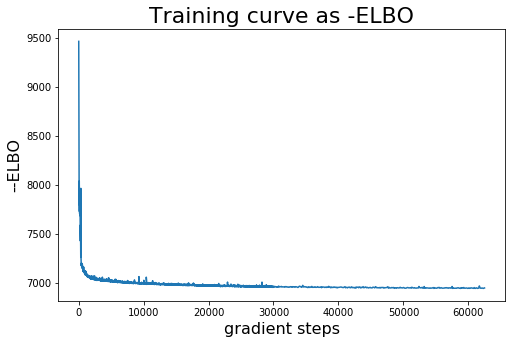

In [123]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(data.step, data['-elbo'])
ax.set_title("Training curve as -ELBO", fontsize=22)
ax.set_ylabel("--ELBO", fontsize=16)
ax.set_xlabel("gradient steps", fontsize=16)
fig.savefig(os.path.join(log_dir, 'elbo_curve.png'))